In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/sl/jzcf6d695l390nhhyd2ztnqc0000gn/T/ipykernel_2807/265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_carbon = pd.read_csv("datasets/carbon_footprint_by_product.csv")
df_greenhouse = pd.read_csv("datasets/greenhouse_gas_emissions.csv")
df_nf = pd.read_csv("datasets/normalizing_factors.csv")

In [3]:
df_carbon.head()

,Release Year,Product,Baseline Storage,Carbon Footprint
0,2023,iPhone 15,128,56
1,2022,iPhone 14,128,61
2,2021,iPhone 13,128,64
3,2020,iPhone 12,64,70
4,2019,iPhone 11,64,72


In [4]:
df_greenhouse.head()

,Fiscal Year,Category,Type,Scope,Description,Emissions
0,2022,Corporate emissions,Gross emissions,Scope 1,"Natural gas, diesel, propane",39700.0
1,2022,Corporate emissions,Gross emissions,Scope 1,Fleet vehicles,12600.0
2,2022,Corporate emissions,Gross emissions,Scope 1,Other (R&D processes & refrigerant leaks),2900.0
3,2022,Corporate emissions,Gross emissions,Scope 2 (market-based),Electricity,0.0
4,2022,Corporate emissions,Gross emissions,Scope 2 (market-based),"Steam, heating, and cooling",3000.0


In [5]:
df_nf.head()

,Fiscal Year,Revenue,Market Capitalization,Employees
0,2022,394328,2490,164000
1,2021,365817,2450,154000
2,2020,274515,1720,147000
3,2019,260174,1090,137000
4,2018,265595,830,132000


In [6]:
df_greenhouse.isnull().sum()

Fiscal Year     0
Category        0
Type            0
Scope          16
Description     0
Emissions      27
dtype: int64

In [7]:
df_greenhouse['Scope'].fillna('Unknown', inplace=True)
df_greenhouse['Emissions'].fillna(0,inplace=True)

/var/folders/sl/jzcf6d695l390nhhyd2ztnqc0000gn/T/ipykernel_2807/3184675678.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_greenhouse['Scope'].fillna('Unknown', inplace=True)
/var/folders/sl/jzcf6d695l390nhhyd2ztnqc0000gn/T/ipykernel_2807/3184675678.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [8]:
total_emissions_per_year = df_greenhouse.groupby('Fiscal Year')['Emissions'].sum()

emissions_2015 = df_greenhouse[df_greenhouse['Fiscal Year'] == 2015]['Emissions'].sum()

emissions_2022 = df_greenhouse[df_greenhouse['Fiscal Year'] == 2022]['Emissions'].sum()

reduction = total_emissions_per_year.loc[2015] - total_emissions_per_year.loc[2022]

print("Total emissions in 2015:", emissions_2015)

print("Total emissions in 2022:", emissions_2022)

print("Total emission reduction from 2015 to 2022:", reduction)

Total emissions in 2015: 38383470.0
Total emissions in 2022: 20279900.0
Total emission reduction from 2015 to 2022: 18103570.0


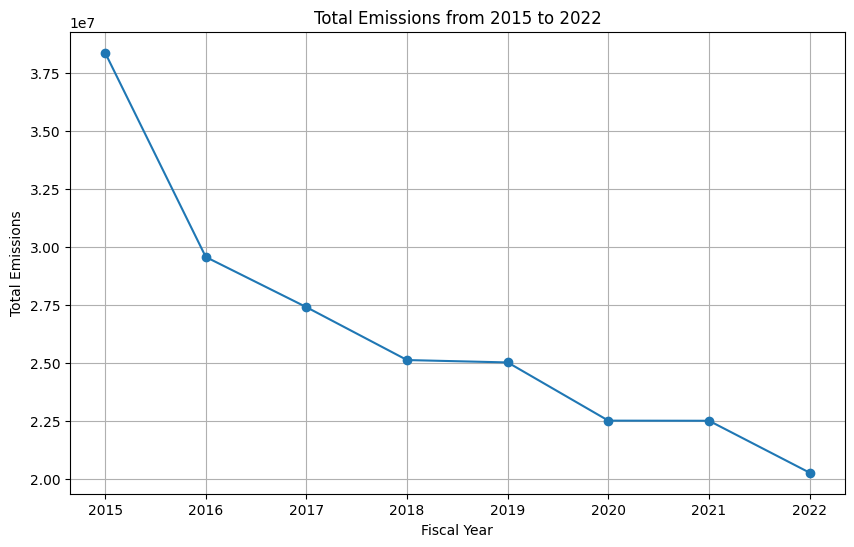

In [9]:
total_emissions_per_year = df_greenhouse.groupby('Fiscal Year')['Emissions'].sum()

plt.figure(figsize=(10, 6))
plt.plot(total_emissions_per_year.index, total_emissions_per_year.values, marker='o')
plt.title('Total Emissions from 2015 to 2022')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.show()